<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science  - Regresión Lineal</h1>

# <font color='red' style='font-size: 30px;'>Conociendo el Dataset</font>

<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np

## Bibliotecas opcionales

## El Dataset y el Proyecto
<hr>

### Fuente: https://www.kaggle.com/greenwing1985/housepricing

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nuestro objetivo en este ejercicio es crear un modelo de Machine Learning, mediante la técnica de regresión lineal, que haga predicciones sobre los precios de las propriedades a partir de un conjunto de características conocidas de las propriedades.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Usaremos un dataset disponible en Kaggle que fue generado por ordenador para entrenamiento de machine learning para principiantes. Este conjunto de datos fue modificado para facilitar nuestro objetivo, que es fijar los conocimientos adquiridos en el proyecto de Regresión lineal.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga los pasos propuestos en los comentarios arriba de cada celda y buenos estudios.</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precio</b> - Precio de la propriedad</li>
    <li><b>área</b> - Área de la propriedad</li>
    <li><b>garaje</b> - Número de plazas de garaje</li>
    <li><b>baño</b> - Número de baños de la propriedad</li>
    <li><b>chimenea</b> - Número de chimeneas da la propriedad</li>
    <li><b>mármol</b> - Si la propiedad está acabada en mármol blanco (1) o no (0)</li>
    <li><b>piso</b> - Si la propiedad tiene más de un piso (1) o no (0)</li>
</ul>

## Lectura de los datos

Dataset está en la carpeta "Datos" con el nombre "HousePrices_HalfMil.csv", y el separador ";" es usado.

In [7]:
datos = pd.read_csv("Datos/HousePrices_HalfMil.csv", sep = ";")

## Ver los datos

In [8]:
datos.head(10)

,precios,area,garaje,banos,chimenea,marmol,pisos
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
5,35450,148,2,5,2,0,0
6,52025,211,2,3,2,1,0
7,37550,172,2,2,3,1,0
8,31500,62,1,4,2,0,0
9,37650,218,3,1,0,1,0


## Verificando el tamaño del dataset

In [9]:
datos.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Analisis Preliminar</font>
<hr style='border: 2px solid red;'>

## Estadísticos descriptivos

In [14]:
datos.describe().round(2)

,precios,area,garaje,banos,chimenea,marmol,pisos
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta.</p>

### Observe las correlaciones entre las variables:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>¿Cuáles están más correlacionadas con la variable dependiente (precio)?</li>
    <li>¿Cuál es la relación entre ellas (positiva o negativa)?</li>
    <li>¿Hay correlación fuerte entre las variables explicativas?</li>
</ul>

In [17]:
datos.corr().round(2)

,precios,area,garaje,banos,chimenea,marmol,pisos
precios,1.00,0.12,0.10,0.12,0.11,0.43,0.63
area,0.12,1.00,-0.01,-0.01,0.01,-0.02,-0.02
garaje,0.10,-0.01,1.00,0.07,0.06,-0.02,-0.02
banos,0.12,-0.01,0.07,1.00,0.05,-0.03,-0.02
chimenea,0.11,0.01,0.06,0.05,1.00,0.03,-0.00
marmol,0.43,-0.02,-0.02,-0.03,0.03,1.00,-0.01
pisos,0.63,-0.02,-0.02,-0.02,-0.00,-0.01,1.00


# <font color='red' style='font-size: 30px;'>Comportamiento de la Variable Dependiente (Y)</font>
<hr style='border: 2px solid red;'>

# Análisis gráfico

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

## Importando la biblioteca seaborn

In [18]:
import seaborn as sns

## Configure el estilo y color de los gráficos (opcional)

In [35]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

## Box plot de la variable *dependiente* (y)


### Evalúe el comportamiento de la distribución de la variable dependiente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>¿Parece haber valores atípicos?</li>
    <li>¿El box plot muestra alguna asimetría?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'Precio de propiedades'}, ylabel='Precio ($)'>

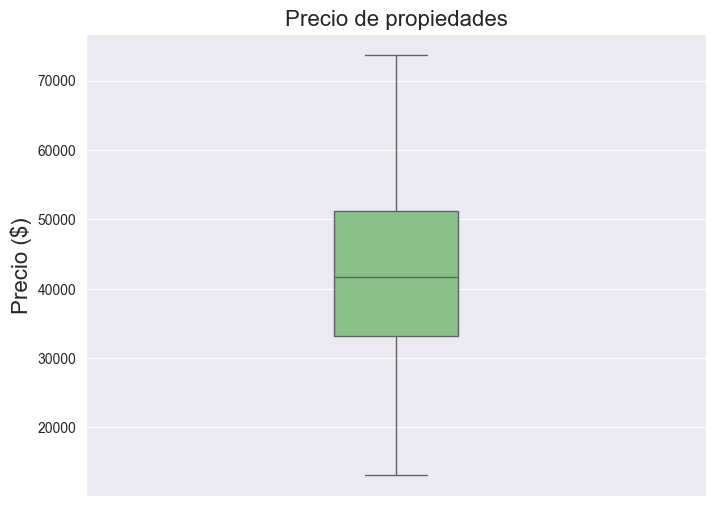

In [36]:
ax = sns.boxplot(data=datos["precios"], orient="v", width=0.2)

ax.figure.set_size_inches(8, 6)
ax.set_title("Precio de propiedades", fontsize = 16)
ax.set_ylabel('Precio ($)', fontsize=16)
ax

## Investigando la variable *dependiente* (y) junto con otras características.

Construya un box plot de la variable dependiente junto con cada variable explicativa (solo las categóricas).

### Evalúe el comportamiento de la distribución de la variable dependiente con cada variable explicativa categórica:

<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>¿Los estadísticos cambian significativamente entre las categorías?</li>
    <li>¿Tiene el box plot alguna tendencia bien definida?</li>
</ul>

### Box-plot (Precio X Garaje)

<Axes: title={'center': 'Precio de propiedades'}, xlabel='Número de Plazas de Garaje', ylabel='Precio ($)'>

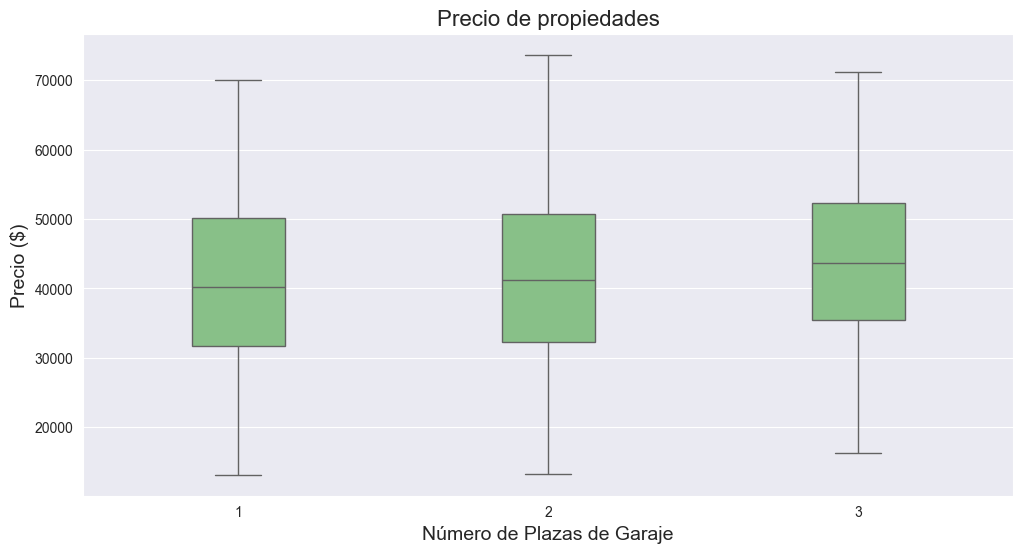

In [33]:
ax = sns.boxplot(y="precios", x = "garaje",data=datos, orient="v", width=0.3)

ax.figure.set_size_inches(12, 6)
ax.set_title("Precio de propiedades", fontsize = 16)
ax.set_ylabel('Precio ($)', fontsize=14)
ax.set_xlabel('Número de Plazas de Garaje', fontsize=14)
ax

### Box-plot (Precio X Baños)

<Axes: title={'center': 'Precio de propiedades'}, xlabel='Número de Baños', ylabel='Precio ($)'>

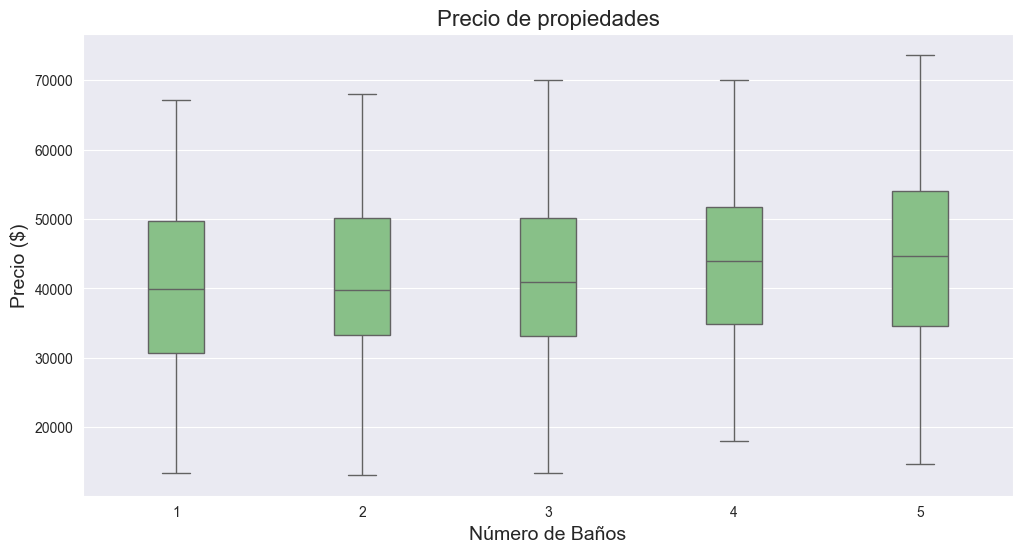

In [34]:
ax = sns.boxplot(y="precios", x = "banos",data=datos, orient="v", width=0.3)

ax.figure.set_size_inches(12, 6)
ax.set_title("Precio de propiedades", fontsize = 16)
ax.set_ylabel('Precio ($)', fontsize=14)
ax.set_xlabel('Número de Baños', fontsize=14)
ax

### Box-plot (Precio X Chimenea)

<Axes: title={'center': 'Precio de propiedades'}, xlabel='Número de chimeneas', ylabel='Precio ($)'>

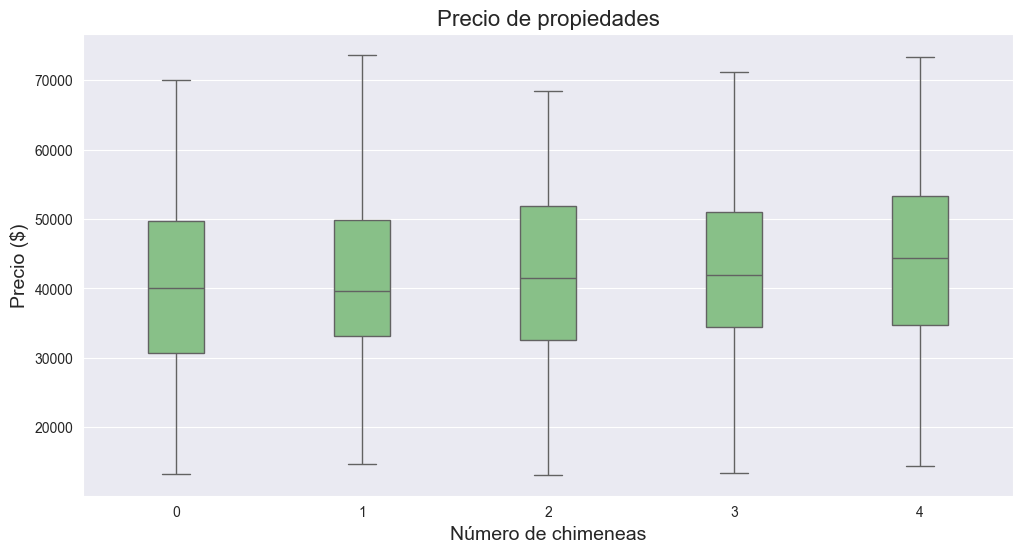

In [37]:
ax = sns.boxplot(y="precios", x = "chimenea",data=datos, orient="v", width=0.3)

ax.figure.set_size_inches(12, 6)
ax.set_title("Precio de propiedades", fontsize = 16)
ax.set_ylabel('Precio ($)', fontsize=14)
ax.set_xlabel('Número de chimeneas', fontsize=14)
ax

### Box-plot (Precio X Acabado de Mármol)

<Axes: title={'center': 'Precio de propiedades'}, xlabel='Acabados de marmol', ylabel='Precio ($)'>

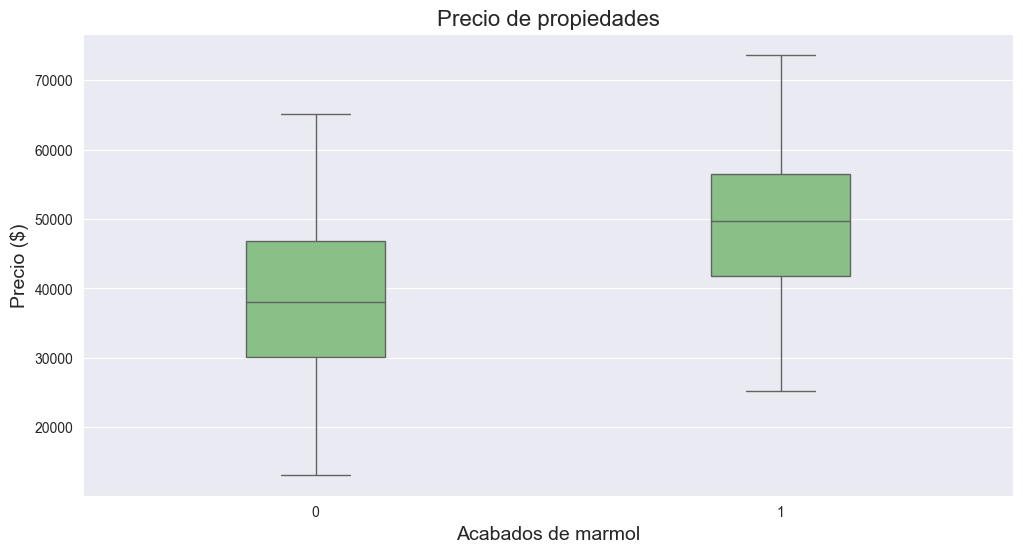

In [38]:
ax = sns.boxplot(y="precios", x = "marmol",data=datos, orient="v", width=0.3)

ax.figure.set_size_inches(12, 6)
ax.set_title("Precio de propiedades", fontsize = 16)
ax.set_ylabel('Precio ($)', fontsize=14)
ax.set_xlabel('Acabados de marmol', fontsize=14)
ax

### Box-plot (Precio X Pisos)

<Axes: title={'center': 'Precio de propiedades'}, xlabel='Mas de un piso', ylabel='Precio ($)'>

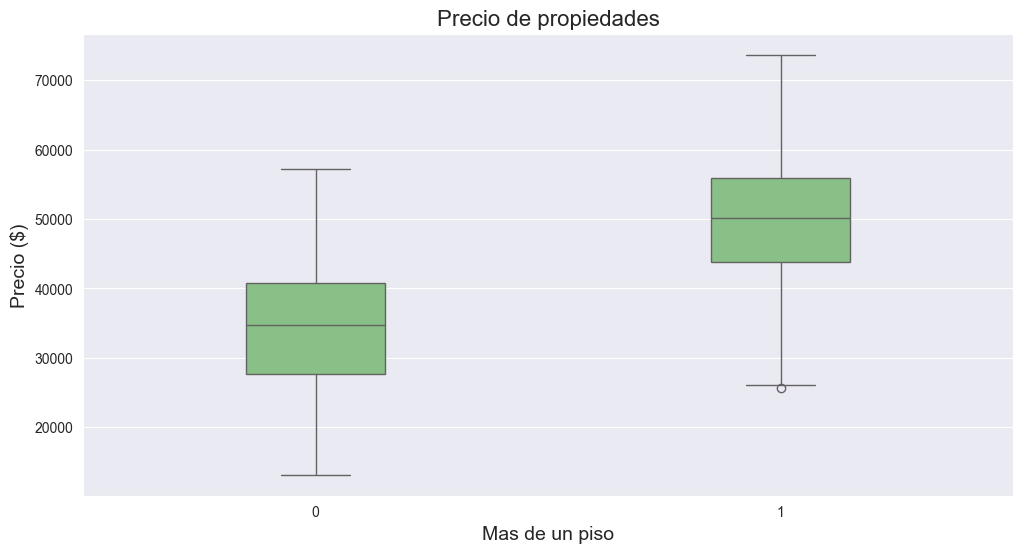

In [40]:
ax = sns.boxplot(y="precios", x = "pisos",data=datos, orient="v", width=0.3)

ax.figure.set_size_inches(12, 6)
ax.set_title("Precio de propiedades", fontsize = 16)
ax.set_ylabel('Precio ($)', fontsize=14)
ax.set_xlabel('Mas de un piso', fontsize=14)
ax

## Distribución de frecuencias de la variable *dependiente* (y)

Construya un histograma de la variable dependiente (Precio).

### Evalúe:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>¿Parece asimétrica la distribución de frecuencias de la variable dependiente?</li>
    <li>¿Es posible suponer que la variable dependiente sigue una distribución normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

Text(0.5, 0, 'Precio ($)')

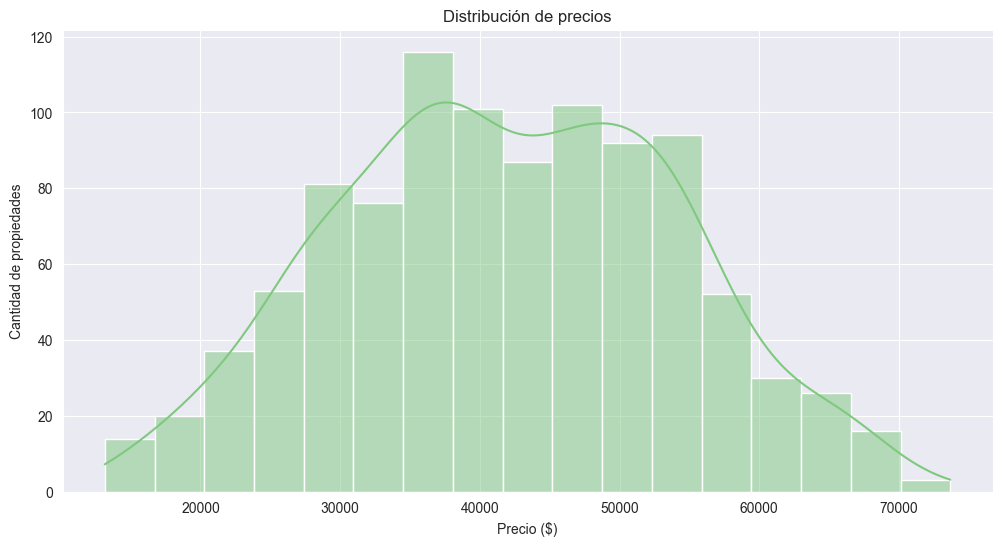

In [43]:
ax = sns.histplot(datos["precios"], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribución de precios")
ax.set_ylabel("Cantidad de propiedades")
ax.set_xlabel("Precio ($)")


## Gráficos de dispersión entre las variables del dataset

## Graficar el pairplot fijando solo una variable en el eje y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Grafique diagramas de dispersión de la variable dependiente contra cada variable explicativa. Para ello utilice el pairplot de la biblioteca seaborn.

Construya el mismo gráfico usando el parámetro kind = 'reg'.

### Evalúe:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>¿Es posible identificar alguna relación lineal entre las variables?</li>
    <li>¿La relación es positiva o negativa?</li>
    <li>Compare con los resultados obtenidos en la matriz de correlación.</li>
</ul>

# <font color='red' style='font-size: 30px;'>Estimando un Modelo de Regresión Lineal</font>
<hr style='border: 2px solid red;'>

## Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Creando una Series (pandas) para almacenar la variable dependiente (y)

## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

## Creando los datasets de entrenamiento y de prueba

## Importando *LinearRegression* y *metrics* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

## Instanciando la clase *LinearRegression()*

## Utilizando el método *fit()* para estimar el modelo lineal con los datos de ENTRENAMIENTO (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Evalúe:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>¿El modelo presenta un buen ajuste?</li>
    <li>¿Recuerdas lo que representa R²?</li>
    <li>¿Qué podemos hacer para mejorar esta estadística?</li>
</ul>

## Generando predicciones para los datos de PRUEBA (X_test) con el método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

## Obteniendo el coeficiente de determinación (R²) para las predicciones de nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

# <font color='red' style='font-size: 30px;'>Obteniendo Predicciones Puntuales</font>
<hr style='border: 2px solid red;'>

## Creando un simulador simple

Cree un simulador que genere estimaciones de precios a partir de un conjunto de informaciones sobre la propiedad.

# <font color='red' style='font-size: 30px;'>Métricas de Regresión</font>
<hr style='border: 2px solid red;'>

## Métricas da regresión
<hr>

fuente: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algunas estadísticas obtenidas del modelo de regresión son muy útiles como criterio para comparar varios modelos estimados y seleccionar el mejor modelo. Las principales métricas de regresión que scikit-learn pone a disposición para los modelos lineales son las siguientes:

### Error Cuadrático Medio

Media de los cuadrados de los errores. Los mejores ajustes tienen un $EQM$ más bajo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz del Error Cuadrático Medio

Raíz cuadrada de la media de los cuadrados de los errores. Los mejores ajustes tienen un $\sqrt{EQM}$ más bajo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Creando un dataframe con las métricas

# <font color='red' style='font-size: 30px;'>Guardando y cargando el modelo estimado</font>


<hr style='border: 2px solid red;'>

## Importando la biblioteca pickle

## Guardando el modelo estimado

### En un nuevo notebook/proyecto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_precio','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garaje = 2
banos = 4
chimenea = 4
marmol = 0
pisos = 1

entrada = [[area, garaje, banos, chimenea, marmol, pisos]]

print('{} litros'.format(lm_new.predict(entrada)[0].round(2)))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```